In [1]:
import json
import os
import pickle
import psycopg2
import pandas as pd
import sqlalchemy
import sys
sys.path.append("..")

from connect_db import db_connection


import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns
get_ipython().magic(u'matplotlib inline')
%matplotlib inline

username='ywang99587'




from scipy.spatial import distance
import scipy.spatial.distance
from scipy.spatial.distance import cdist, pdist
import pylab as pl

In [2]:
cred_location = '../connect_db/data_creds_redshift.json.nogit'  ## changed to TPT
db = db_connection.DBConnection(cred_location)

In [3]:
q_ger8 = """
select *
from tpt.tuscany.customer_feature as f
where customer_id  in (select customer_id from tuscany.germany8)
"""

In [4]:
df_Ger_Aug = db.sql_query_to_data_frame(q_ger8, cust_id=True)

KeyboardInterrupt: 

In [5]:
q_ger8_loc_feature = """
select *
from tpt.tuscany.german_august_all_features_new
"""

In [6]:
df_Ger_Aug_loc_feature = db.sql_query_to_data_frame(q_ger8_loc_feature, cust_id=True)

In [7]:
df_Ger_Aug.shape

NameError: name 'df_Ger_Aug' is not defined

In [17]:
df_Ger_Aug_loc_feature.shape

(213690, 50)

In [9]:
df_Ger_Aug_loc_feature[df_Ger_Aug_loc_feature.columns] = df_Ger_Aug_loc_feature[df_Ger_Aug_loc_feature.columns].astype(float)

In [10]:
df_Ger_Aug_loc_feature = df_Ger_Aug_loc_feature.fillna(value=0)

In [11]:
df_Ger_Aug_loc_feature.head()

,mcc,hr_arvl_tusc,day_of_wk_arvl_tusc,mon_arvl_tusc,day_arvl_tusc,loc_arvl_tusc,hr_arvl_italy,day_of_wk_arvl_italy,mon_arvl_italy,day_arvl_italy,...,livorno,lucca,pisa,pistoia,siena,coast,num_attrs,towns,islands,subrub
0,262.0,15.0,0.0,8.0,6.0,59892013.0,15.0,0.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,262.0,17.0,5.0,8.0,4.0,3602049.0,17.0,5.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,286.0
2,262.0,15.0,1.0,8.0,21.0,57063013.0,10.0,1.0,8.0,21.0,...,0.0,2103.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
3,262.0,15.0,1.0,8.0,21.0,57069013.0,15.0,1.0,8.0,21.0,...,0.0,0.0,0.0,0.0,0.0,144.0,18.0,2.0,0.0,0.0
4,262.0,17.0,5.0,8.0,4.0,3061082.0,17.0,5.0,8.0,4.0,...,299.0,0.0,202.0,0.0,247.0,299.0,32.0,1.0,0.0,0.0


In [12]:
df_Ger_Aug.columns

NameError: name 'df_Ger_Aug' is not defined

In [13]:
df_Ger_Aug.to_csv('/mnt/data/shared/Germany_Aug_features.csv')

In [13]:
df_Ger_Aug_loc_feature.to_csv('/mnt/data/shared/Germany_Aug_features_with_locs.csv')

In [16]:
type(df_Ger_Aug['hrs_in_tusc'])

pandas.core.series.Series

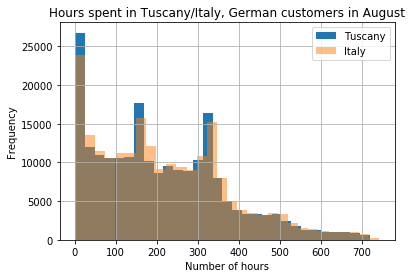

In [16]:
df_Ger_Aug_loc_feature['hrs_in_tusc'].astype(float).hist(bins=30, label="Tuscany")
df_Ger_Aug_loc_feature['hrs_in_italy'].astype(float).hist(bins=30,label="Italy",alpha=.5)
#sns.despine()
plt.title('Hours spent in Tuscany/Italy, German customers in August')  
plt.xlabel('Number of hours')  
plt.ylabel('Frequency')  
plt.legend()

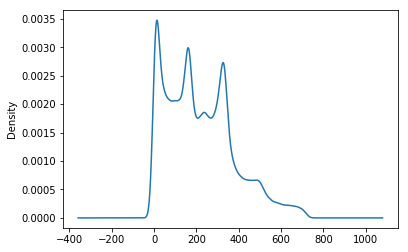

In [19]:
df_Ger_Aug['hrs_in_tusc'].astype(float).plot.density()